In [1]:
from numba_code import *
import matplotlib.pyplot as plt
plt.style.use('default')

## Test 1, s=0.0001  K=100, number of mutant=100, simulations=10

In [2]:
#Initial state for the star
in_numbers=np.array([[0.,100.],[100.,0.],[0.,100.],[0.,100.]]).astype(np.int64)
    
#Parameters
mO=1e-2/2
mI=3e-2/2
s=0.0001
fitnesses=np.array([1+s,1])
nb_cycles=1000
t= np.log(100)
N_demes=4
K=100
folder='Test1/Star'

In [3]:
#Migration matrix of the star
migration_matrix=define_star(N_demes,mI,mO, equal_contribution=True)

In [4]:
#Fixation probability 
nb_sim=10
et, ft, fp = fixation_probability(in_numbers, folder, migration_matrix, fitnesses, nb_sim, nb_cycles, t, K, size_follow_numbers=1000, print_frequency=1, save_dynamics=True)
print(f'Fixation probability on {nb_sim} simulations is {fp}, with \n average extinction time {et} and \n average fixation time {ft}')

Fixation probability on 10 simulations is 0.5, with 
 average extinction time 412.0 and 
 average fixation time 884.4


In [5]:
#Initial state for the wm
in_numbers=np.array([[0.,100.],[100.,0.],[0.,100.],[0.,100.]]).astype(np.int64)
    
#Parameters
m=1e-2

s=0.0001
fitnesses=np.array([1+s,1])
nb_cycles=1000
t=5
N_demes=4
K=100
folder='Test1/Wm'

#Migration matrix of the clique
migration_matrix=define_clique(N_demes,m)

In [9]:
#Fixation probability 
nb_sim=10
et, ft, fp = fixation_probability(in_numbers, folder, migration_matrix, fitnesses, nb_sim, nb_cycles, t, K, size_follow_numbers=1000, print_frequency=1, save_dynamics=True)
print(f'Fixation probability on {nb_sim} simulations is {fp}, with \n average extinction time {et} and \n average fixation time {ft}')

Fixation probability on 10 simulations is 0.4, with 
 average extinction time 356.0 and 
 average fixation time 752.5


### Trajectories

In [6]:
def ratios(fix, x, deme):
    
    #Number of mutants in deme in the first x steps of the dynamics
    deme_mutant=fix[:x,deme,0]

    #Number of wild-types in deme in the first x steps of the dynamics
    deme_WT=fix[:x,deme,1]

    #Ratio of mutant in deme in the first x steps of the dynamics
    #deme_ratioM=deme_mutant/(deme_WT+deme_mutant)
    
    return deme_mutant, deme_WT


def extract_fix(path, x, deme,n):
    
    deme_dynamics = []
    
    for i in range(n):
        path_sub = path + '/fix_' + str(i+1) + '.npz'
        fix = np.load(path_sub)['arr_0']
        deme_dynamics.append(ratios(fix,x,deme))
    
    return mean(deme_dynamics,x,n)

def extract_ex(path, x, deme,n):
    
    deme_dynamics = []
    
    for i in range(n):
        path_sub = path + '/ex_' + str(i) + '.npz'
        fix = np.load(path_sub)['arr_0']
        deme_dynamics.append(ratios(fix,x,deme))
    
    return mean(deme_dynamics,x,n)

def extracts_ex(path,x,n):
    return extract_ex(path,x,0,n),extract_ex(path,x,1,n),extract_ex(path,x,2,n),extract_ex(path,x,3,n)

def extracts_fix(path,x,n):
    return extract_fix(path,x,0,n),extract_fix(path,x,1,n),extract_fix(path,x,2,n),extract_fix(path,x,3,n)

def mean(val,x,n):
    
    mutant = np.zeros(x)
    wt = np.zeros(x)
    
    for i in range(n):
        mutant += val[i][0]
        wt += val[i][1]
        
    return mutant/(wt+mutant)

In [7]:
x=1000
star_fix_center, star_fix_1, star_fix_2, star_fix_3 = extracts_fix("Test1/Star",x,5)
star_ex_center, star_ex_1, star_ex_2, star_ex_3 = extracts_ex("Test1/Star",x,5)

In [10]:
x=1000
wm_fix_center, wm_fix_1, wm_fix_2, wm_fix_3 = extracts_fix("Test1/Wm",x,4)
wm_ex_center, wm_ex_1, wm_ex_2, wm_ex_3 = extracts_ex("Test1/Wm",x,6)

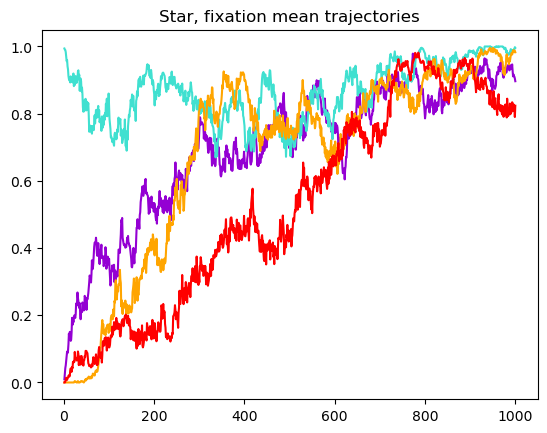

In [11]:
center = 'darkviolet'
leaf1 = 'turquoise'
leaf2 = 'orange'
leaf3 = 'red'

plt.plot(np.arange(1,x+1,1),star_fix_center,color=center)
plt.plot(np.arange(1,x+1,1),star_fix_1,color=leaf1)
plt.plot(np.arange(1,x+1,1),star_fix_2,color=leaf2)
plt.plot(np.arange(1,x+1,1),star_fix_3,color=leaf3)
plt.title('Star, fixation mean trajectories')
plt.show()

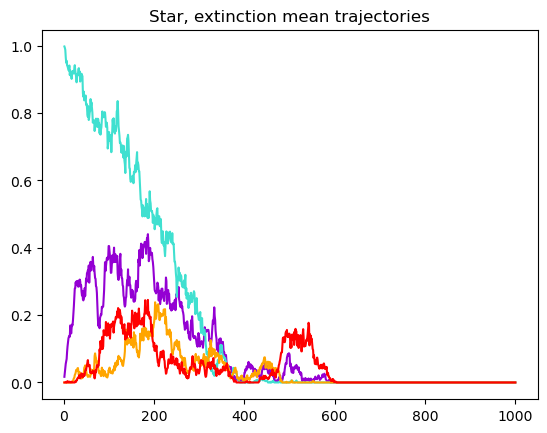

In [12]:
plt.plot(np.arange(1,x+1,1),star_ex_center,color=center)
plt.plot(np.arange(1,x+1,1),star_ex_1,color=leaf1)
plt.plot(np.arange(1,x+1,1),star_ex_2,color=leaf2)
plt.plot(np.arange(1,x+1,1),star_ex_3,color=leaf3)
plt.title('Star, extinction mean trajectories')
plt.show()

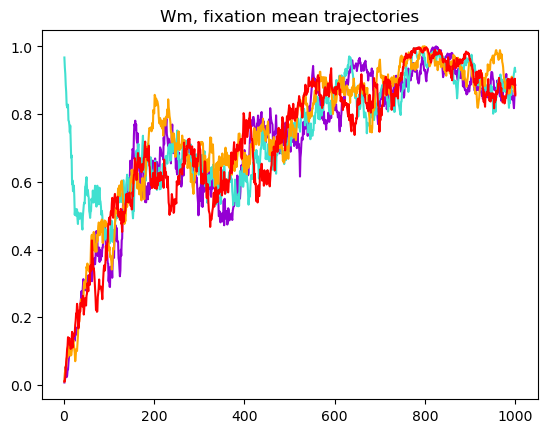

In [13]:
plt.plot(np.arange(1,x+1,1),wm_fix_center,color=center)
plt.plot(np.arange(1,x+1,1),wm_fix_1,color=leaf1)
plt.plot(np.arange(1,x+1,1),wm_fix_2,color=leaf2)
plt.plot(np.arange(1,x+1,1),wm_fix_3,color=leaf3)
plt.title('Wm, fixation mean trajectories')
plt.show()

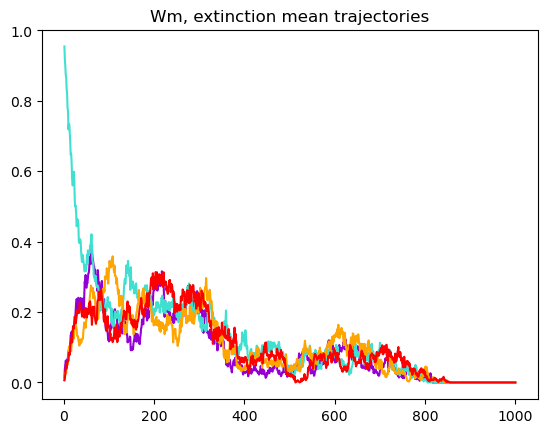

In [15]:
plt.plot(np.arange(1,x+1,1),wm_ex_center,color=center)
plt.plot(np.arange(1,x+1,1),wm_ex_1,color=leaf1)
plt.plot(np.arange(1,x+1,1),wm_ex_2,color=leaf2)
plt.plot(np.arange(1,x+1,1),wm_ex_3,color=leaf3)
plt.title('Wm, extinction mean trajectories')
plt.show()